<a href="https://colab.research.google.com/github/blackman147/data_science_with_python/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This analysis provide insight on richest classes of food of cereals food and thier importance with the recommedation base on the analysis are report

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls


In [43]:
cereals_df = pd.read_csv("cereal.csv")
cereals_df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


the weight an

In [44]:
cereals_df['weight'].value_counts()

1.00    64
1.33     5
0.50     2
1.50     2
1.25     2
1.30     1
0.83     1
Name: weight, dtype: int64

In [45]:
def nutritions_per_kg(cols):
    for col in cols:
        cereals_df[col] = cereals_df[col]/cereals_df['weight']
    
cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
nutritions_per_kg(cols)

In [46]:
cereals_df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,-0.181257,0.485225,0.132558,-0.663329,0.199731,0.378254,-0.535713,0.057572,-0.067530,-0.093900,0.340815,-0.647803
protein,-0.181257,1.000000,0.149399,-0.152149,0.461829,-0.120526,-0.493234,0.502966,-0.089922,0.085516,-0.118919,-0.176032,0.579989
fat,0.485225,0.149399,1.000000,-0.021551,-0.012314,-0.405125,0.254409,0.154862,-0.050147,0.228984,0.116809,-0.156307,-0.394232
sodium,0.132558,-0.152149,-0.021551,1.000000,-0.138577,0.195749,0.047089,-0.152205,0.365300,-0.134266,0.144609,0.153235,-0.370928
fiber,-0.663329,0.461829,-0.012314,-0.138577,1.000000,-0.405664,-0.262234,0.908725,-0.091534,0.266303,0.114419,-0.503449,0.642710
carbo,0.199731,-0.120526,-0.405125,0.195749,-0.405664,1.000000,-0.501460,-0.461151,0.114982,-0.143032,-0.372195,0.446646,0.211908
sugars,0.378254,-0.493234,0.254409,0.047089,-0.262234,-0.501460,1.000000,-0.167533,0.054505,0.033678,0.279221,-0.000591,-0.765400
potass,-0.535713,0.502966,0.154862,-0.152205,0.908725,-0.461151,-0.167533,1.000000,-0.093558,0.333285,0.204816,-0.500466,0.489321
vitamins,0.057572,-0.089922,-0.050147,0.365300,-0.091534,0.114982,0.054505,-0.093558,1.000000,0.266203,0.189656,0.148098,-0.221229
shelf,-0.067530,0.085516,0.228984,-0.134266,0.266303,-0.143032,0.033678,0.333285,0.266203,1.000000,0.190762,-0.335269,0.025159


The result of the correletion shows that the variable are negatively correlated which mean that when one value increases the other variable decreases

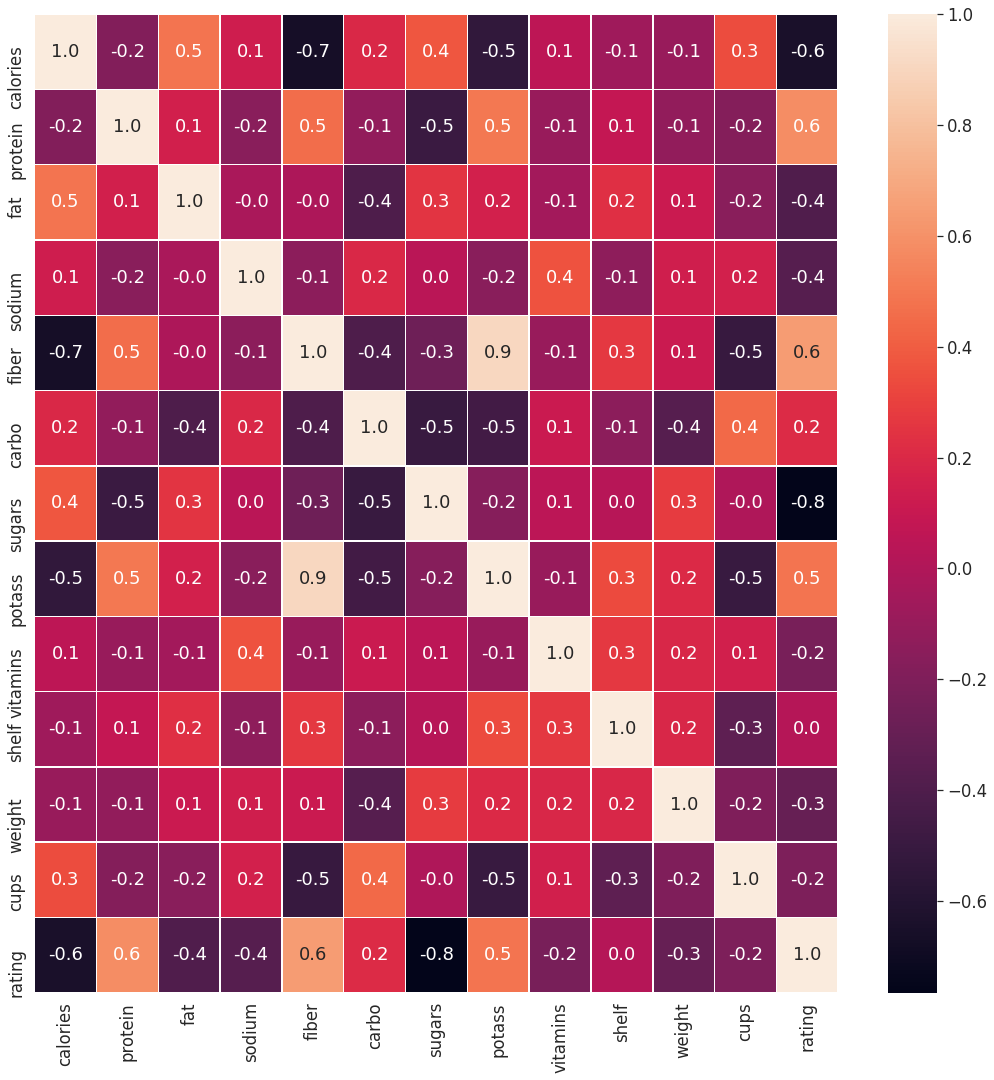

In [47]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(cereals_df.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax=ax)
plt.show()

In [48]:
cereals_df.round(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.40
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.98
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.70
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3,1.0,0.75,34.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3,1.0,0.75,39.11
73,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2,1.0,1.00,27.75
74,Wheat Chex,R,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1,1.0,0.67,49.79
75,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1,1.0,1.00,51.59


In [49]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     float64
 4   protein   77 non-null     float64
 5   fat       77 non-null     float64
 6   sodium    77 non-null     float64
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     float64
 10  potass    77 non-null     float64
 11  vitamins  77 non-null     float64
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(12), int64(1), object(3)
memory usage: 9.8+ KB


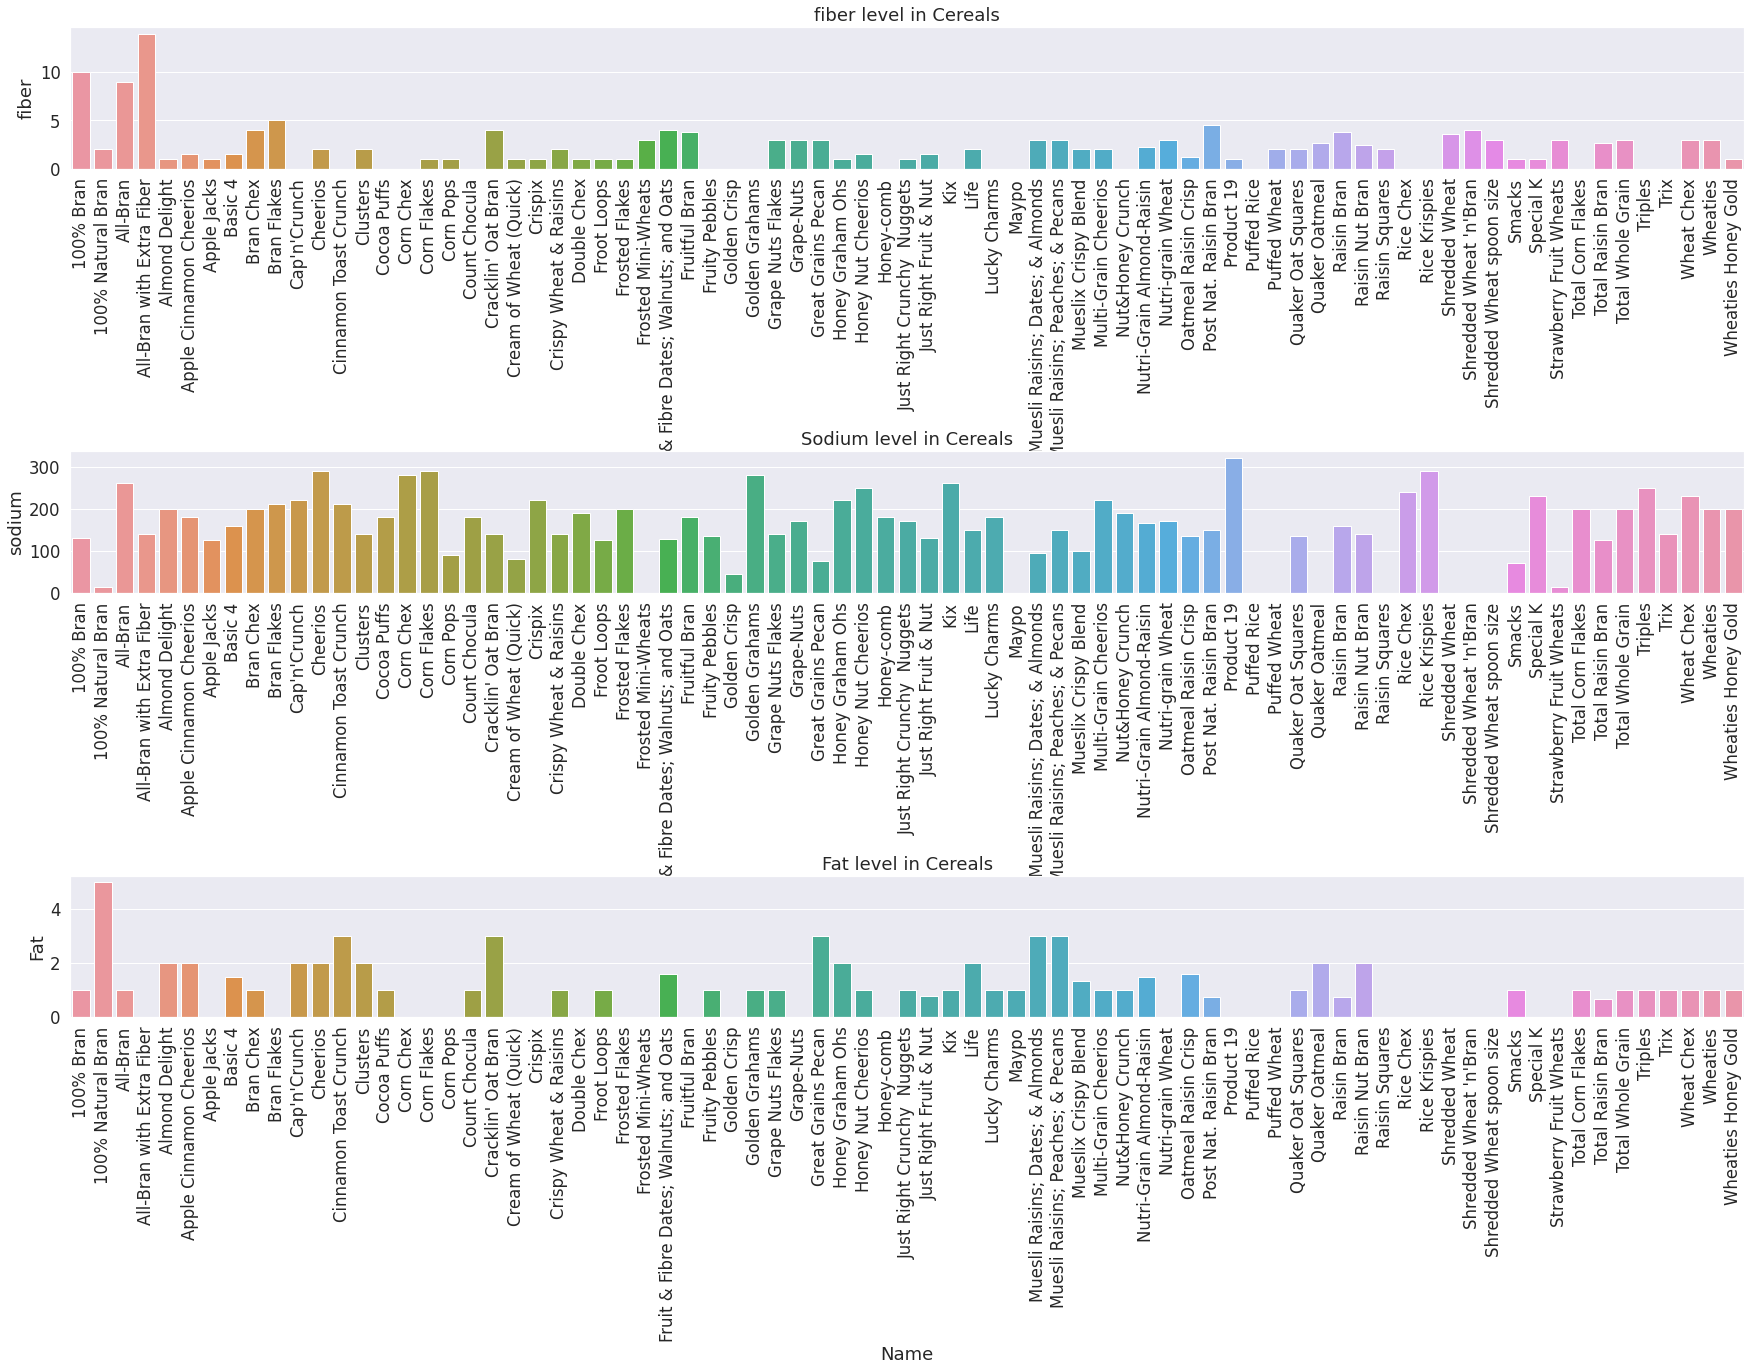

In [50]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

plt.subplot(311)

ax = sns.barplot(x='name', y='fiber', data=cereals_df)
ax.set_xticklabels(cereals_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='fiber')
ax.set_title('fiber level in Cereals')

plt.subplot(312)
ax = sns.barplot(x='name', y='sodium', data=cereals_df)
ax.set_xticklabels(cereals_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='sodium')
ax.set_title('Sodium level in Cereals')

plt.subplot(313)
ax = sns.barplot(x='name', y='fat', data=cereals_df)
ax.set_xticklabels(cereals_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='Fat')
ax.set_title('Fat level in Cereals')


plt.subplots_adjust(hspace = 2.0, top = 1.5)

plt.show()


As we can see from the bar chart above,
All-Bran with extra fiber has the higest fibre content of 14grams.
product 19 has the highest level of sodium 320 miligrams.
100% Natural Bran has the highest Fat at 4 grams.


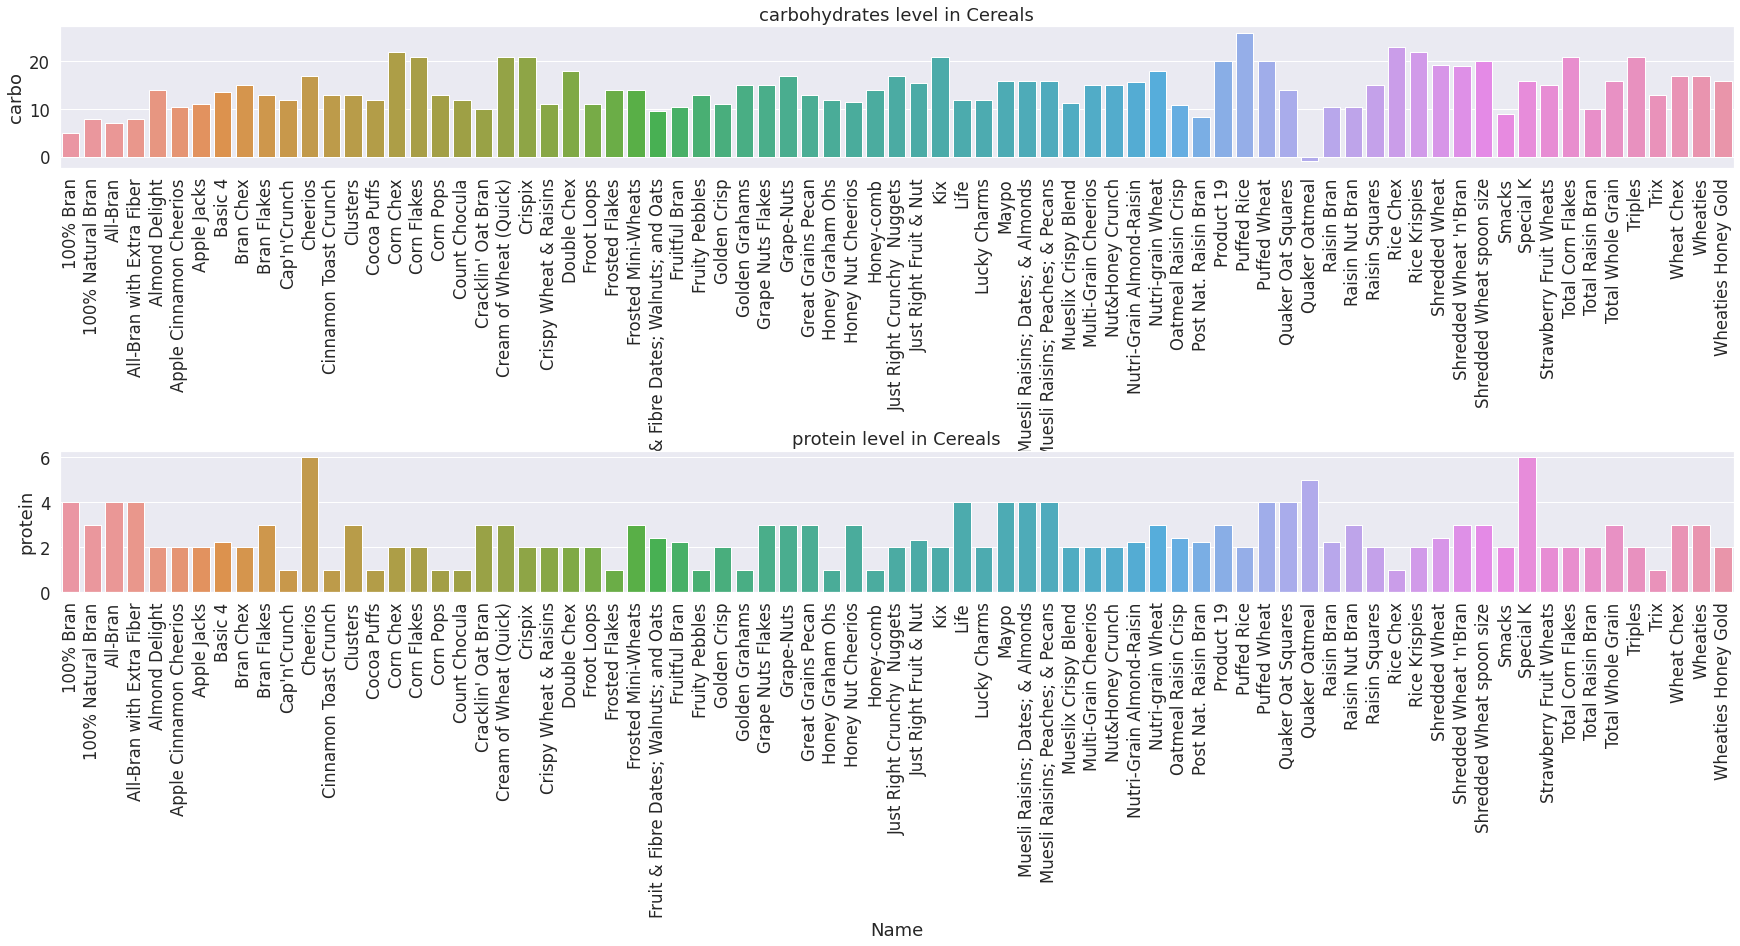

In [51]:
plt.figure(figsize = (30,10))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)

plt.subplot(311)

ax = sns.barplot(x='name', y='carbo',data=cereals_df)
ax.set_xticklabels(cereals_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='carbo')
ax.set_title('carbohydrates level in Cereals')

plt.subplot(312)
ax = sns.barplot(x='name', y='protein',data=cereals_df)
ax.set_xticklabels(cereals_df['name'], rotation=90, ha="center")
ax.set(xlabel='Name',ylabel='protein')
ax.set_title('protein level in Cereals')

plt.subplots_adjust(hspace = 2.0, top = 1.5)

plt.show()



from the bar chart above
Puffed rice has the highest carbonhydrate level at 25 grams.
Cheerios and special K both contain the highest levels of protein at 6 grams.

In [52]:
!pip install chart_studio

In [86]:
from chart_studio import plotly as iplot
# from  plotly.offline import plot
# import plotly.offline as py 
# py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
# import plotly.graph_objs as go # it's like "plt" of matplot
# import plotly.tools as tls # It's useful to we get some tools of plotly
# import warnings # This library will be used to ignore some warnings

carbonhydrate = cereals_df.groupby('name')['carbo'].sum().to_frame().reset_index()
fiber = cereals_df.groupby('name')['fiber'].sum().to_frame().reset_index()
fat = cereals_df.groupby('name')['fat'].sum().to_frame().reset_index()
protein = cereals_df.groupby('name')['protein'].sum().to_frame().reset_index()
sodium = cereals_df.groupby('name')['sodium'].sum().to_frame().reset_index()
potass = cereals_df.groupby('name')['potass'].sum().to_frame().reset_index()

colors = None
trace0 = go.Scatter(x =carbonhydrate['name'], y=carbonhydrate['carbo'],
               mode = 'lines+markers',
               name = 'carbo')
trace1 = go.Scatter(x=fat['name'], y=fat['fat'],
               mode = 'lines+markers',
               name = 'fat')
trace2 = go.Scatter(x=fiber['name'], y=fiber['fiber'],
              mode = 'lines+markers',
              name = 'fiber')
trace3 = go.Scatter(x=protein['name'], y=protein['protein'],
              mode = 'lines+markers',
              name = 'protein')
trace4= go.Scatter(x=sodium['name'], y=sodium['sodium'],
              mode = 'lines+markers',
              name = 'sodium')
trace5= go.Scatter(x=potass['name'], y=potass['potass'],
              mode = 'lines+markers',
              name = 'potass')


layout = dict(title= 'Carbohydrate, Protein, Sodium, potass, Fats, and Fibre  level in each cereal', 
                  font=dict(family='Courier New, monospace', size=9, color='#7f7f7f'),
                  height=400, width=800,)
fig = dict(data=[trace0, trace1, trace2, trace3, trace4, trace5], layout = layout)
py.iplot(fig)

The diagram above displays the level of components each cereal contains

In [55]:
carbonhydrates = cereals_df[['name', 'carbo']]
carbonhydrates.head()


,name,carbo
0,100% Bran,5.0
1,100% Natural Bran,8.0
2,All-Bran,7.0
3,All-Bran with Extra Fiber,8.0
4,Almond Delight,14.0


The table above shows the level of carbonhydrate in each cereal. 

In [56]:
print (carbonhydrates)

                         name  carbo
0                   100% Bran    5.0
1           100% Natural Bran    8.0
2                    All-Bran    7.0
3   All-Bran with Extra Fiber    8.0
4              Almond Delight   14.0
..                        ...    ...
72                    Triples   21.0
73                       Trix   13.0
74                 Wheat Chex   17.0
75                   Wheaties   17.0
76        Wheaties Honey Gold   16.0

[77 rows x 2 columns]


In [57]:
carbo_sort = carbonhydrates.sort_values(by="carbo", ascending=False )

In [58]:
top_five = carbo_sort.head(5)

In [59]:
top_five


,name,carbo
54,Puffed Rice,26.0
61,Rice Chex,23.0
62,Rice Krispies,22.0
15,Corn Chex,22.0
21,Crispix,21.0


The table above displays the top five values of carbonhydrate from highest to lowest.

In [60]:
import matplotlib.pyplot as plt

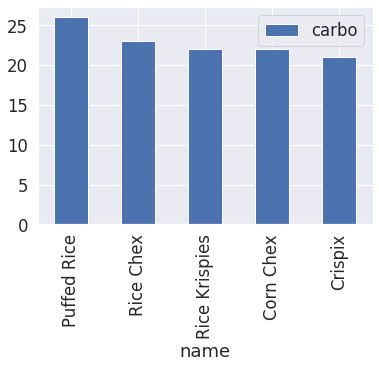

In [61]:
top_five.plot(kind = 'bar', x = 'name', y = 'carbo')

The bar chart above displays the top five cereals with the highest carbonhydrate content. According to research done from the American nutrient association, at least 45 to 65 percent of your daily calories should come from carbohydrates. you need about 202 to 292 grams of carbs a day.


In [62]:
protein = cereals_df[['name', 'protein']]
protein

,name,protein
0,100% Bran,4.0
1,100% Natural Bran,3.0
2,All-Bran,4.0
3,All-Bran with Extra Fiber,4.0
4,Almond Delight,2.0
...,...,...
72,Triples,2.0
73,Trix,1.0
74,Wheat Chex,3.0
75,Wheaties,3.0


In [64]:
protein_sort = protein.sort_values(by="protein", ascending=False )
protein_sort

,name,protein
67,Special K,6.0
11,Cheerios,6.0
57,Quaker Oatmeal,5.0
43,Maypo,4.0
56,Quaker Oat Squares,4.0
...,...,...
37,Honey-comb,1.0
73,Trix,1.0
29,Fruity Pebbles,1.0
25,Frosted Flakes,1.0


In [66]:
pro_top_five = protein_sort.head(5)
pro_top_five

,name,protein
67,Special K,6.0
11,Cheerios,6.0
57,Quaker Oatmeal,5.0
43,Maypo,4.0
56,Quaker Oat Squares,4.0


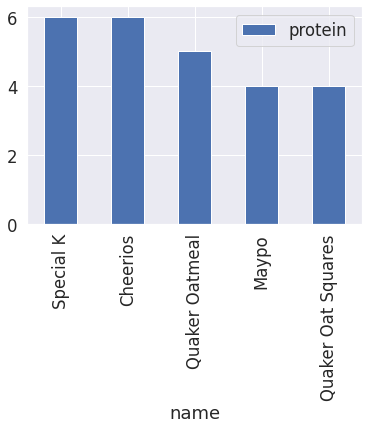

In [67]:
pro_top_five.plot(kind = 'bar', x = 'name', y = 'protein')

The bar chart above displays the top five cereals with the highest protein content.
protein provides energy and also gives structure to cells. your diet should consist of 10 to 35 percent protein which provides 4 calories per gram.

In [68]:
fat = cereals_df[['name', 'fat']]
fat

,name,fat
0,100% Bran,1.0
1,100% Natural Bran,5.0
2,All-Bran,1.0
3,All-Bran with Extra Fiber,0.0
4,Almond Delight,2.0
...,...,...
72,Triples,1.0
73,Trix,1.0
74,Wheat Chex,1.0
75,Wheaties,1.0


In [69]:
fat_sort = fat.sort_values(by="fat", ascending=False )
fat_sort

,name,fat
1,100% Natural Bran,5.0
34,Great Grains Pecan,3.0
44,Muesli Raisins; Dates; & Almonds,3.0
45,Muesli Raisins; Peaches; & Pecans,3.0
19,Cracklin' Oat Bran,3.0
...,...,...
21,Crispix,0.0
30,Golden Crisp,0.0
23,Double Chex,0.0
25,Frosted Flakes,0.0


In [70]:
fat_top_five = fat_sort.head(5)
fat_top_five

,name,fat
1,100% Natural Bran,5.0
34,Great Grains Pecan,3.0
44,Muesli Raisins; Dates; & Almonds,3.0
45,Muesli Raisins; Peaches; & Pecans,3.0
19,Cracklin' Oat Bran,3.0


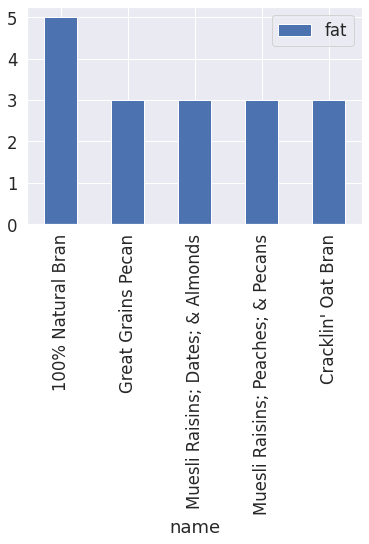

In [71]:
fat_top_five.plot(kind = 'bar', x = 'name', y = 'fat')

The bar chart above displays the top five cereals with the highest Fat content.

In [72]:
fiber =cereals_df[['name', 'fiber']]
fiber

,name,fiber
0,100% Bran,10.0
1,100% Natural Bran,2.0
2,All-Bran,9.0
3,All-Bran with Extra Fiber,14.0
4,Almond Delight,1.0
...,...,...
72,Triples,0.0
73,Trix,0.0
74,Wheat Chex,3.0
75,Wheaties,3.0


In [73]:
fiber_sort = fiber.sort_values(by="fiber", ascending=False )
fiber_sort

,name,fiber
3,All-Bran with Extra Fiber,14.000000
0,100% Bran,10.000000
2,All-Bran,9.000000
9,Bran Flakes,5.000000
52,Post Nat. Raisin Bran,4.511278
...,...,...
31,Golden Grahams,0.000000
37,Honey-comb,0.000000
40,Kix,0.000000
42,Lucky Charms,0.000000


In [74]:
fiber_top_five = fiber_sort.head(5)
fiber_top_five

,name,fiber
3,All-Bran with Extra Fiber,14.000000
0,100% Bran,10.000000
2,All-Bran,9.000000
9,Bran Flakes,5.000000
52,Post Nat. Raisin Bran,4.511278


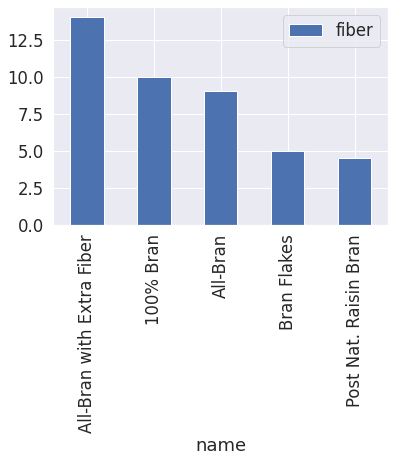

In [75]:
fiber_top_five.plot(kind = 'bar', x = 'name', y = 'fiber')

The bar chart above displays the top five cereals with the highest Fiber content.

In [76]:
potass =cereals_df[['name', 'potass']]
potass


,name,potass
0,100% Bran,280.0
1,100% Natural Bran,135.0
2,All-Bran,320.0
3,All-Bran with Extra Fiber,330.0
4,Almond Delight,-1.0
...,...,...
72,Triples,60.0
73,Trix,25.0
74,Wheat Chex,115.0
75,Wheaties,110.0


In [77]:
potass_sort = potass.sort_values(by='potass', ascending= False)
potass_sort


,name,potass
3,All-Bran with Extra Fiber,330.000000
2,All-Bran,320.000000
0,100% Bran,280.000000
52,Post Nat. Raisin Bran,195.488722
9,Bran Flakes,190.000000
...,...,...
73,Trix,25.000000
25,Frosted Flakes,25.000000
17,Corn Pops,20.000000
20,Cream of Wheat (Quick),-1.000000


In [78]:
potass_top_five = potass_sort.head(5)
potass_top_five

,name,potass
3,All-Bran with Extra Fiber,330.000000
2,All-Bran,320.000000
0,100% Bran,280.000000
52,Post Nat. Raisin Bran,195.488722
9,Bran Flakes,190.000000


In [79]:
soldium =cereals_df[['name', 'sodium']]
soldium

,name,sodium
0,100% Bran,130.0
1,100% Natural Bran,15.0
2,All-Bran,260.0
3,All-Bran with Extra Fiber,140.0
4,Almond Delight,200.0
...,...,...
72,Triples,250.0
73,Trix,140.0
74,Wheat Chex,230.0
75,Wheaties,200.0


In [80]:
sodium_sort = soldium.sort_values(by= 'sodium', ascending = False)
sodium_sort

,name,sodium
53,Product 19,320.0
11,Cheerios,290.0
16,Corn Flakes,290.0
62,Rice Krispies,290.0
31,Golden Grahams,280.0
...,...,...
60,Raisin Squares,0.0
26,Frosted Mini-Wheats,0.0
43,Maypo,0.0
57,Quaker Oatmeal,0.0


In [81]:
sodium_top_five = sodium_sort.head(5)
sodium_top_five

,name,sodium
53,Product 19,320.0
11,Cheerios,290.0
16,Corn Flakes,290.0
62,Rice Krispies,290.0
31,Golden Grahams,280.0


In [82]:
minerals = pd.concat((potass_top_five, sodium_top_five), axis=0)
minerals

,name,potass,sodium
3,All-Bran with Extra Fiber,330.000000,NaN
2,All-Bran,320.000000,NaN
0,100% Bran,280.000000,NaN
52,Post Nat. Raisin Bran,195.488722,NaN
9,Bran Flakes,190.000000,NaN
53,Product 19,NaN,320.0
11,Cheerios,NaN,290.0
16,Corn Flakes,NaN,290.0
62,Rice Krispies,NaN,290.0
31,Golden Grahams,NaN,280.0


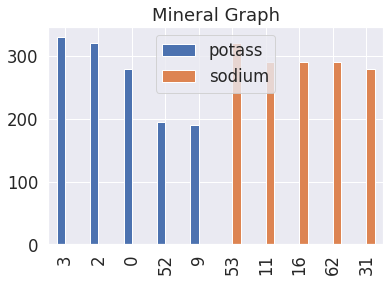

In [83]:
minerals.plot(kind = 'bar', title = 'Mineral Graph')

The bar chart above displays the mineral graph .

NHS Report says : For a healthier option, choose breakfast cereals that contain wholegrains and are lower in carbohydrate, fat and sodium.

cabohydrate, fat and sodium levels You can use the per 100g information on the nutrition label to identify breakfast cereals that are:

High in carbs, fat or sodium

    high in carbs: more than 22.5g of total sugars per 100g
    high in fat: more than 17.5g of fat per 100g
    high in sodium: more than 1.5g of salt per 100g

Low in sugar, fat or salt

    low in carb: 5g of total sugars or less per 100g
    low in fat: 3g of saturated fat or less per 100g
    low in sodium: 0.3g of salt or less per 100g

How many calories should breakfast provide?

A helpful rule of thumb to maintain a healthy weight is to follow the 400-600-600 approach.

That means having about:

400kcal for breakfast (including any drinks and accompaniments) 600kcal for lunch (including any drinks and accompaniments) 600kcal for dinner (including any drinks and accompaniments)
